In [1]:
# loading dataset
import pandas as pd
import numpy as np
df = pd.read_csv('mlexam2.csv')
df.head()

,income,credit_score,creditcard_approval,recent_searches
0,40000,740,yes,"mobile, earphones, screengaurd, ipad, laptop,..."
1,20000,690,no,"mobile, screengaurd, laptop"
2,175000,710,yes,"mobile, earphones, screengaurd, charger"
3,90000,670,no,"laptop, earphones"
4,60000,640,no,"laptop, earphones, mobile, charger"


In [2]:
df.dtypes

income                  int64
credit_score            int64
creditcard_approval    object
recent_searches        object
dtype: object

In [3]:
# converting creditcard_approval into category type
df['creditcard_approval'] = df['creditcard_approval'].astype('category')
df.dtypes

income                    int64
credit_score              int64
creditcard_approval    category
recent_searches          object
dtype: object

In [4]:
# In Python - the Decision Trees work ONLY on quantitative data
x = df.drop(columns=['recent_searches', 'creditcard_approval'])
y = df['creditcard_approval']

In [5]:
from sklearn.model_selection import train_test_split
# creating disjoint train and test data
# using stratified sampling to ensure that each class is represented proportionally in both sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=123)

In [6]:
y_train.value_counts()

creditcard_approval
no     11
yes    10
Name: count, dtype: int64

In [7]:
y_test.value_counts()

creditcard_approval
yes    4
no     2
Name: count, dtype: int64

train and test sets looks balanced.

In [8]:
print('x_train:', '\n')
print(x_train.head(), '\n')

print('y_train:', '\n')
print(y_train.head(), '\n')

print('x_test:', '\n')
print(x_test.head(), '\n')

print('y_test:', '\n')
print(y_test.head(), '\n')


x_train: 

    income  credit_score
21  150000           690
20   53000           620
12  100000           650
26  100000           610
4    60000           640 

y_train: 

21    yes
20     no
12     no
26     no
4      no
Name: creditcard_approval, dtype: category
Categories (2, object): ['no', 'yes'] 

x_test: 

    income  credit_score
23   50000           650
5    55000           705
7   500000           690
8    85000           720
24   20000           690 

y_test: 

23     no
5     yes
7     yes
8     yes
24     no
Name: creditcard_approval, dtype: category
Categories (2, object): ['no', 'yes'] 



In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz 
from sklearn.metrics import confusion_matrix

In [10]:
# instantiating the decision tree with entropy criterion and best splitter
MyDT1 = DecisionTreeClassifier(criterion='entropy', 
                            splitter='best',  
                             )

# instantiating the decision tree with entropy criterion and random splitter
MyDT2 = DecisionTreeClassifier(criterion='entropy', 
                            splitter='random', 
                             )

# instantiating the decision tree with gini criterion and best splitter
MyDT3 = DecisionTreeClassifier(criterion='gini',
                            splitter='best',  
                             )

# instantiating the decision tree with gini criterion and random splitter
MyDT4 = DecisionTreeClassifier(criterion='gini', 
                            splitter='random', 
                             )

In [11]:
# training the model
MyDT1 = MyDT1.fit(x_train, y_train)
MyDT2 = MyDT2.fit(x_train, y_train)
MyDT3 = MyDT3.fit(x_train, y_train)
MyDT4 = MyDT4.fit(x_train, y_train)

In [12]:
# predicting the label on test data
y1_pred = MyDT1.predict(x_test)
y2_pred = MyDT2.predict(x_test)
y3_pred = MyDT3.predict(x_test)
y4_pred = MyDT4.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score, classification_report
# calculating accuracy
accuracy1 = accuracy_score(y_test, y1_pred)
accuracy2 = accuracy_score(y_test, y2_pred)
accuracy3 = accuracy_score(y_test, y3_pred)
accuracy4 = accuracy_score(y_test, y4_pred)

print("Accuracy (criterion='entropy', splitter='best') =", accuracy1)
print("Accuracy (criterion='entropy', splitter='random') =", accuracy2)
print("Accuracy (criterion='gini', splitter='best') =", accuracy3)
print("Accuracy (criterion='gini', splitter='random') =", accuracy4)

Accuracy (criterion='entropy', splitter='best') = 1.0
Accuracy (criterion='entropy', splitter='random') = 1.0
Accuracy (criterion='gini', splitter='best') = 1.0
Accuracy (criterion='gini', splitter='random') = 1.0


In [25]:
# generating the tree viz
TREE_data = tree.export_graphviz(MyDT1, out_file=None,
                  feature_names=x.columns,
                  filled=True, 
                  rounded=True,  
                  special_characters=True) 
                                   
graph = graphviz.Source(TREE_data) 
graph.render("exam2_1") 

'exam2_1.pdf'

In [26]:
# generating the tree viz
TREE_data = tree.export_graphviz(MyDT2, out_file=None,
                  feature_names=x.columns,
                  filled=True, 
                  rounded=True,  
                  special_characters=True) 
                                   
graph = graphviz.Source(TREE_data) 
graph.render("exam2_2") 

'exam2_2.pdf'

In [27]:
# generating the tree viz
TREE_data = tree.export_graphviz(MyDT3, out_file=None,
                  feature_names=x.columns,
                  filled=True, 
                  rounded=True,  
                  special_characters=True) 
                                   
graph = graphviz.Source(TREE_data) 
graph.render("exam2_3") 

'exam2_3.pdf'

In [28]:
# generating the tree viz
TREE_data = tree.export_graphviz(MyDT4, out_file=None,
                  feature_names=x.columns,
                  filled=True, 
                  rounded=True,  
                  special_characters=True) 
                                   
graph = graphviz.Source(TREE_data) 
graph.render("exam2_4") 

'exam2_4.pdf'

In [15]:
MyDT1_cm = confusion_matrix(y_test, y1_pred)
MyDT2_cm = confusion_matrix(y_test, y2_pred)
MyDT3_cm = confusion_matrix(y_test, y3_pred)
MyDT4_cm = confusion_matrix(y_test, y4_pred)

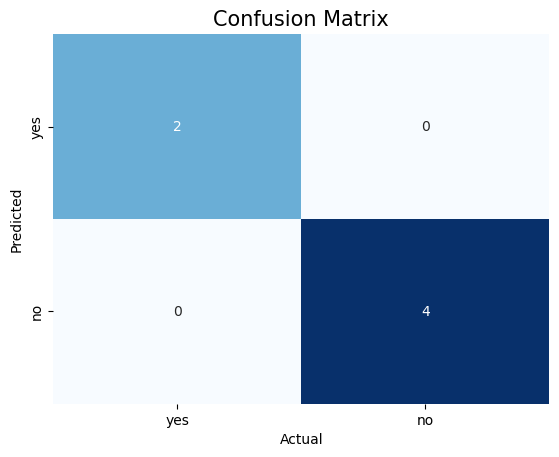

In [16]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

labels = y.unique()

# if only first row values are annotated then upgrade your seaborn
# pip install seaborn --upgrade
sns.heatmap(MyDT1_cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Actual", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
plt.show()

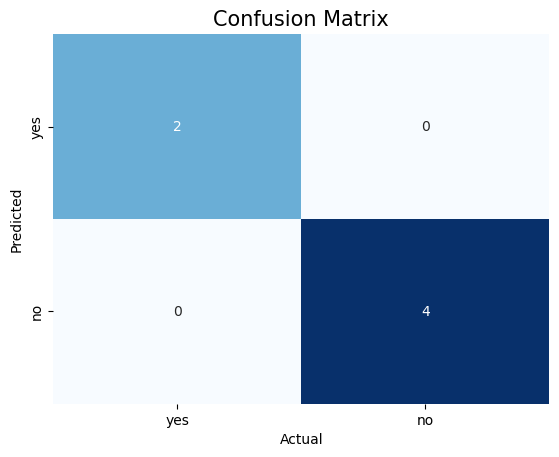

In [17]:
sns.heatmap(MyDT2_cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Actual", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
plt.show()

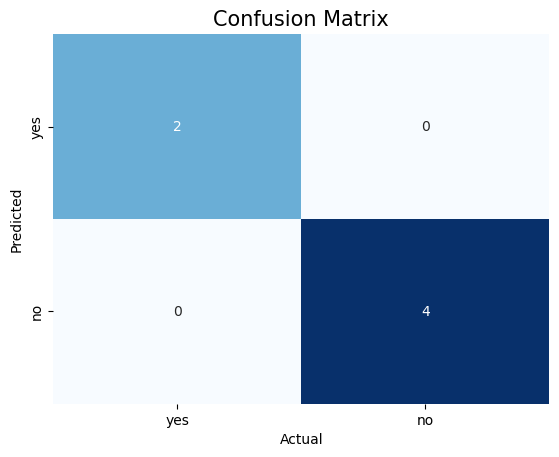

In [18]:
sns.heatmap(MyDT3_cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Actual", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
plt.show()

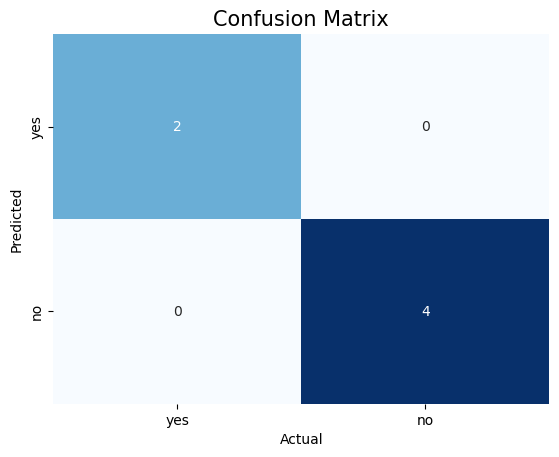

In [19]:
sns.heatmap(MyDT4_cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Actual", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
plt.show()

In [20]:
# checking the feature importance for each tree
feature_importances1 = MyDT1.feature_importances_
feature_importances2 = MyDT2.feature_importances_
feature_importances3 = MyDT3.feature_importances_
feature_importances4 = MyDT4.feature_importances_

In [21]:
feature_names = x.columns
# sorting the importance in descending order
feature_imp1 = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances1})
feature_imp1 = feature_imp1.sort_values(by='Importance', ascending=False)
feature_imp1

,Feature,Importance
1,credit_score,0.76941
0,income,0.23059


In [22]:
# sorting the importance in descending order
feature_imp2 = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances2})
feature_imp2 = feature_imp2.sort_values(by='Importance', ascending=False)
feature_imp2

,Feature,Importance
1,credit_score,0.985446
0,income,0.014554


In [23]:
# sorting the importance in descending order
feature_imp3 = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances3})
feature_imp3 = feature_imp3.sort_values(by='Importance', ascending=False)
feature_imp3

,Feature,Importance
1,credit_score,0.826446
0,income,0.173554


In [24]:
# sorting the importance in descending order
feature_imp4 = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances4})
feature_imp4 = feature_imp4.sort_values(by='Importance', ascending=False)
feature_imp4

,Feature,Importance
1,credit_score,0.796364
0,income,0.203636
